In [1]:
%run traj_analysis.py

In [3]:
data_home = './CYP2D6_traj_analysis/CYP2D6_data/'
figure_home = './CYP2D6_traj_analysis/figures/'

# Essential Dynamics
## PCA
The calculation is made over all the residues. The following code plots PC1 vs Pc2

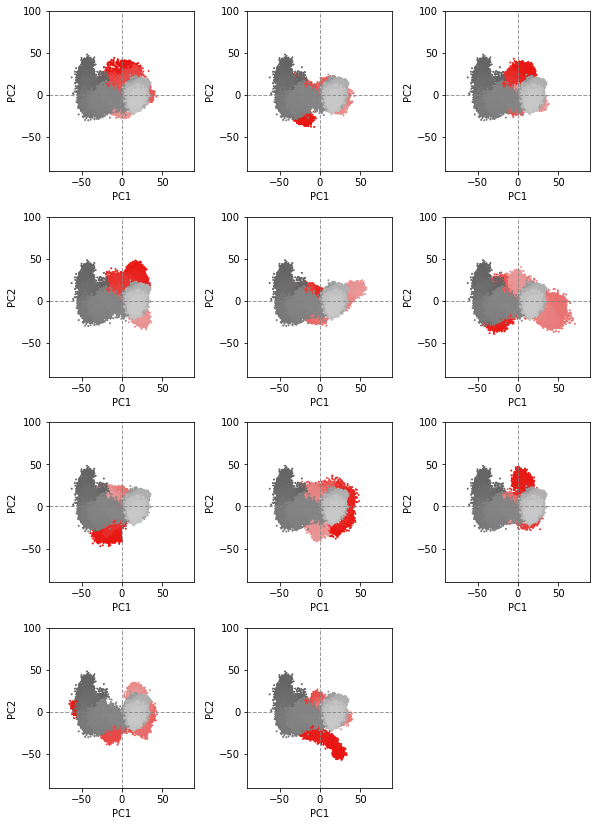

In [4]:
pca_L91M = np.loadtxt(data_home+"PCA/L91M/L91M_pca.txt")
pca_P34S = np.loadtxt(data_home+"PCA/P34S/P34S_pca.txt")
pca_S486T = np.loadtxt(data_home+"PCA/S486T/S486T_pca.txt")
pca_V104M = np.loadtxt(data_home+"PCA/V104M/V104M_pca.txt")
pca_V136I = np.loadtxt(data_home+"PCA/V136I/V136I_pca.txt")
pca_V338M = np.loadtxt(data_home+"PCA/V338M/V338M_pca.txt")
pca_Y355C = np.loadtxt(data_home+"PCA/Y355C/Y355C_pca.txt")
pca_P267H = np.loadtxt(data_home+"PCA/P267H/P267H_pca.txt")
pca_R365H = np.loadtxt(data_home+"PCA/R365H/R365H_pca.txt")
pca_T107I = np.loadtxt(data_home+"PCA/T107I/T107I_pca.txt")
pca_V119L = np.loadtxt(data_home+"PCA/V119L/V119L_pca.txt")

pca_wt = np.loadtxt(data_home+"PCA/wt/wt_pca.txt")
pca_table = [pca_wt, pca_L91M, pca_P34S, pca_S486T, pca_V104M, pca_V136I, pca_V338M, pca_Y355C, pca_P267H, pca_R365H, pca_T107I, pca_V119L]


graph_dim = parameterPlt(pca_table, size_rows=14, mode="superpose")
plt.rcParams["figure.figsize"] = (graph_dim[0][0], graph_dim[0][1])
plotPcs(pca_table, col_number=graph_dim[1][0], row_number=graph_dim[1][1], xmin=-90.0, xmax=90.0, ymin=-90.0, ymax=100.0, pc1 = 1, pc2=2, point_size=1 )
plt.savefig(figure_home+"/pc1_pc2_withoutloops.png", dpi=300)

The following code plots PC3 vs PC4

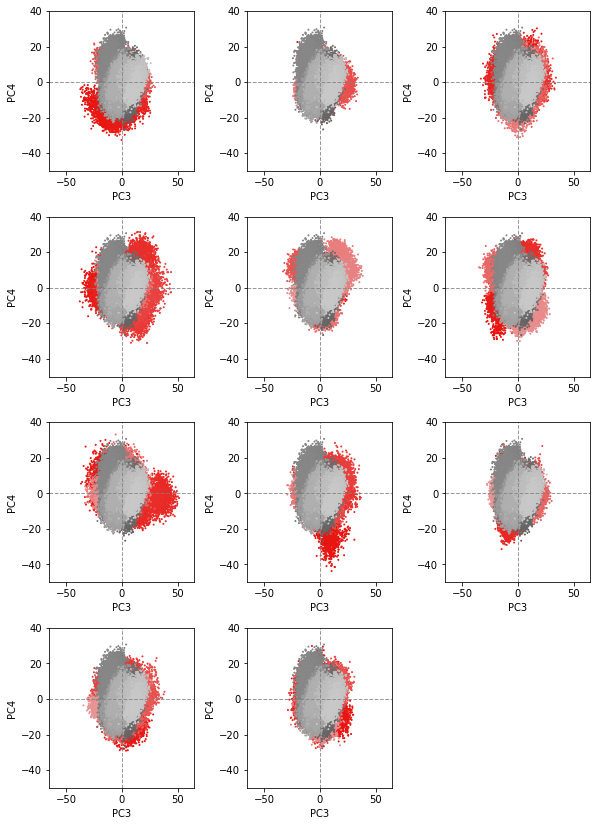

In [5]:
plotPcs(pca_table, col_number=graph_dim[1][0], row_number=graph_dim[1][1], xmin=-65.0, xmax=65.0, ymin=-50.0, ymax=40.0, pc1 = 3, pc2=4, point_size=1 )
plt.savefig(figure_home+"/pc3_pc4_withoutloops.png", dpi=300)

## RMSD


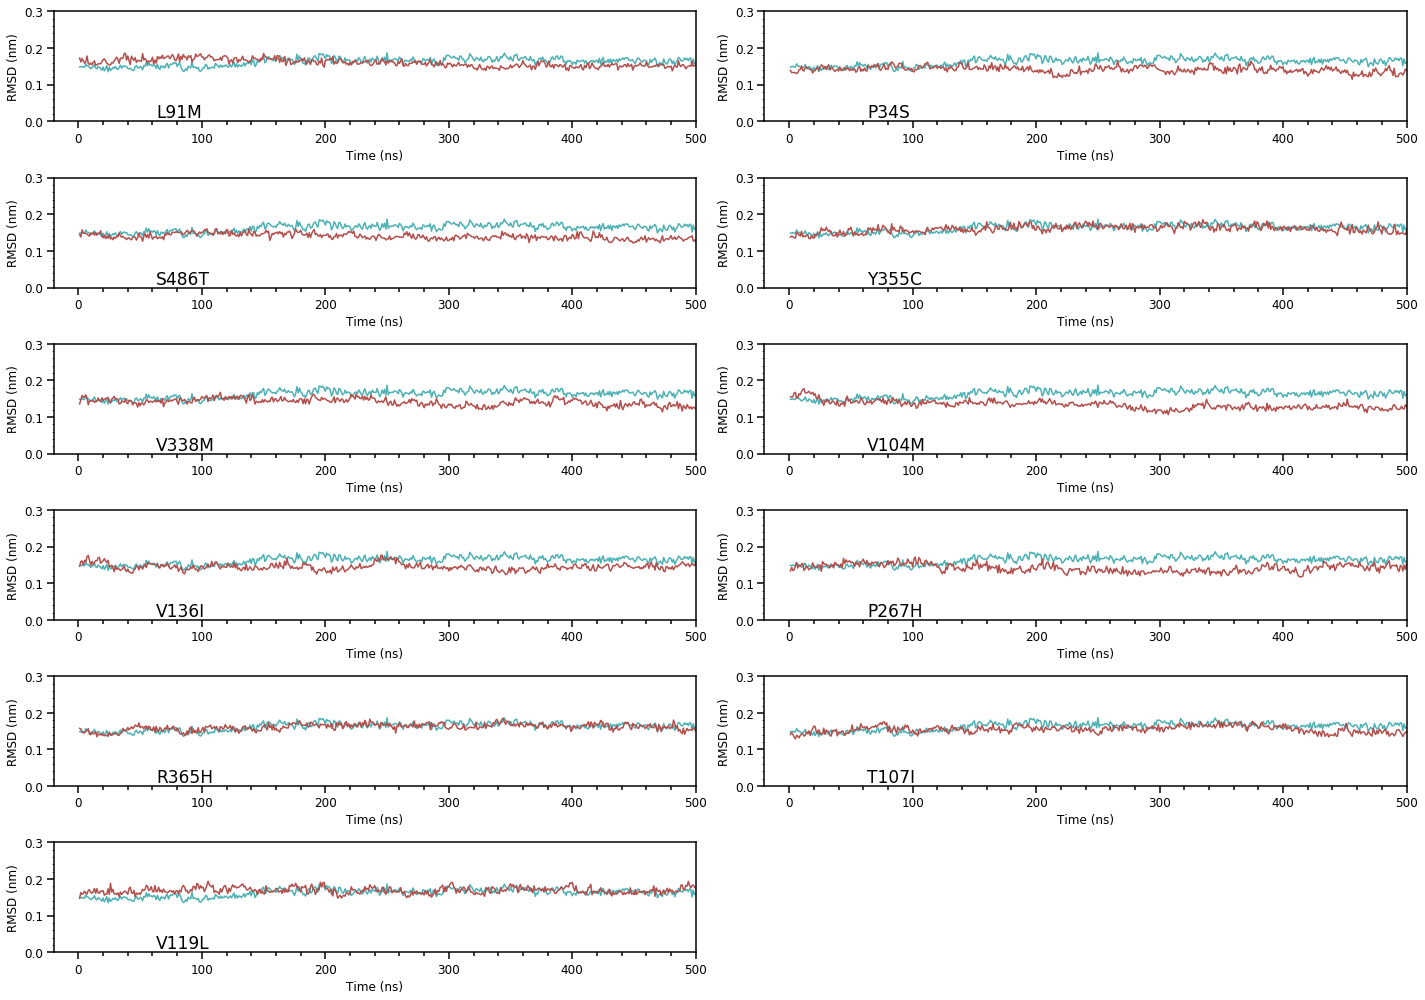

In [4]:
color_palette = ["#4bb1b4", "#B44E4B"]

plt.rcParams["figure.figsize"] = (20,14)
plt.rcParams['axes.linewidth'] = 1.5 #set the value globally
plt.rcParams['xtick.major.size'] = 7
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.major.size'] = 7
plt.rcParams['ytick.major.width'] = 1.5

traj_wt = pd.read_csv(data_home+"wt_RMSD.csv")

traj_CYP2D6_L91M = pd.read_csv(data_home+"L91M_RMSD.csv")
traj_CYP2D6_P34S = pd.read_csv(data_home+"P34S_RMSD.csv")
traj_CYP2D6_S486T = pd.read_csv(data_home+"S486T_RMSD.csv")
traj_CYP2D6_Y355C = pd.read_csv(data_home+"Y355C_RMSD.csv")
traj_CYP2D6_V338M = pd.read_csv(data_home+"V338M_RMSD.csv")
traj_CYP2D6_V104M = pd.read_csv(data_home+"V104M_RMSD.csv")
traj_CYP2D6_V136I = pd.read_csv(data_home+"V136I_RMSD.csv")
traj_CYP2D6_P267H = pd.read_csv(data_home+"P267H_RMSD.csv")
traj_CYP2D6_R365H = pd.read_csv(data_home+"R365H_RMSD.csv")
traj_CYP2D6_T107I = pd.read_csv(data_home+"T107I_RMSD.csv")
traj_CYP2D6_V119L = pd.read_csv(data_home+"V119L_RMSD.csv")

REFHOME="/home/bsitabule/lustre/MD_simulations/MD_analysis/CYP2D6_ref/new_CYP2D6.pdb"
common_ref = md.load(REFHOME)

traj_table = [ traj_CYP2D6_L91M, traj_CYP2D6_P34S, traj_CYP2D6_S486T, traj_CYP2D6_Y355C, traj_CYP2D6_V338M, traj_CYP2D6_V104M, traj_CYP2D6_V136I, traj_CYP2D6_P267H, traj_CYP2D6_R365H, traj_CYP2D6_T107I, traj_CYP2D6_V119L ]
cell_number = len(traj_table)
col_number = 2
row_number = len(traj_table)//col_number + len(traj_table)%col_number
trawt = traj_wt
label= [ "L91M", "P34S", "S486T", "Y355C", "V338M", "V104M", "V136I", "P267H", "R365H", "T107I", "V119L" ]

for index, trajectory  in enumerate(traj_table): 
    plt.subplot(row_number, col_number, index+1 )
    trajmut = trajectory
    plt.plot( trawt.Time*100, trawt.RMSD, color=color_palette[0] )
    plt.plot( trajmut.Time*100, trajmut.RMSD, color= color_palette[-1] )
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel("Time (ns)", fontsize=12)
    plt.ylabel("RMSD (nm)", fontsize=12)
    plt.tight_layout()
    plt.annotate( label[index] , (63, 0.01), fontsize=17)
    plt.minorticks_on()
    plt.ylim(0, 0.3)
    plt.xlim(-20, 500)
    plt.savefig("/home/bsitabule/lustre/MD_simulations/MD_analysis/CYP2D6_traj_analysis/figures/RMSD_backbone.png", dpi=300)


## RMSF calculation


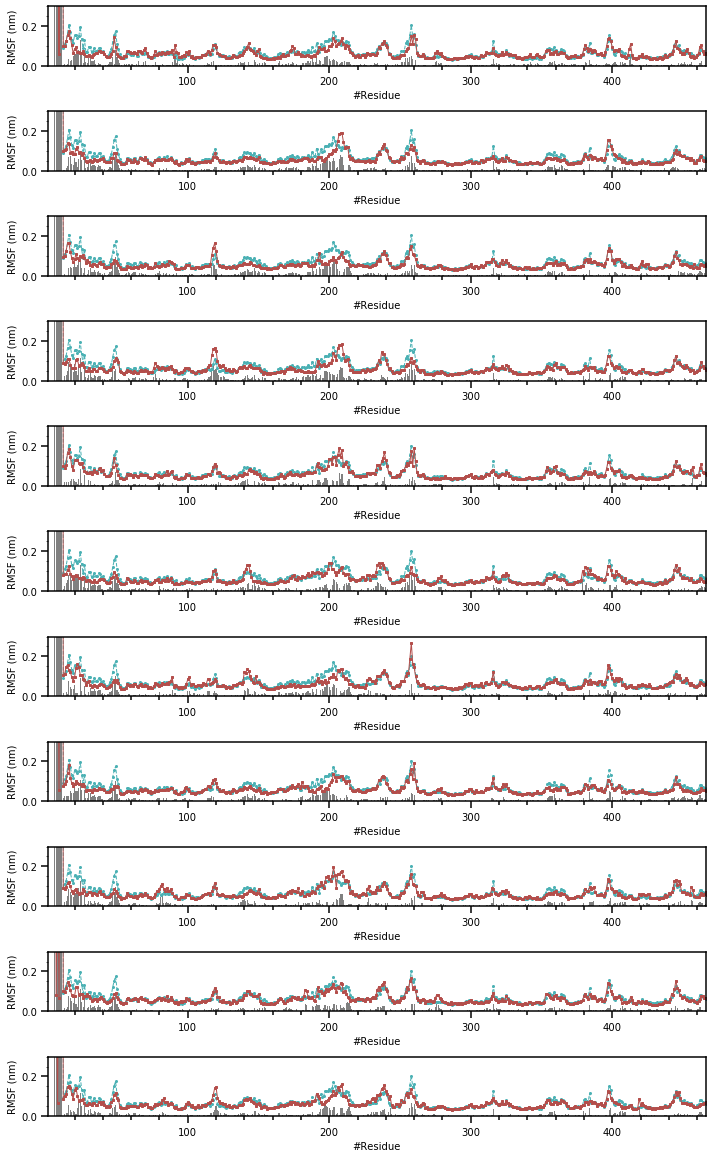

In [6]:
plt.rcParams["figure.figsize"] = (10,16)

# construct a list containing a trajectory object (ndtraj) of the wt at index 0 
#wt_and_vars_trajs =  [traj_wt] + traj_table
# reference = common_ref  # the reference structure is the crystal structure 3tbg

labels= ["L91M", "P34S", "S486T", "Y355C", "V338M", "V104M", "V136I", "P267H", "R365H", "T107I", "V119L"]

rmsfs = pd.read_csv(data_home+labels[0]+'_RMSF.csv')

for label in labels[1:]: 
    df = pd.read_csv(data_home+label+'_RMSF.csv')
    rmsfs=pd.concat([rmsfs, df[label]], axis=1)

rmsfs.to_csv(data_home+"all_RMSFs.csv", index=False)

plot_rmsf = RmsfPlots(data_home+"all_RMSFs.csv", 8)
plot_rmsf.PlotRmsfVars(range_of_data=[1, 466], output="/home/bsitabule/lustre/MD_simulations/MD_analysis/CYP2D6_traj_analysis/figures/rmsf_1to466.png")
